<div align="center">
<h2>Can Age and Experience Predict Playtime? A KNN Regression Analysis of Minecraft Server Data</h2

Leena Tagourti, Julie Sieg, add ur name! 

# Introduction 

**Background**

**Research Question**

**Data Description**

**Table 1: Description of Dataset Variables**

| **Variable Name**     | **Data Type** | **Description**                                                                                   | **Example Value**                                                                                   |
|-----------------------|---------------|---------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------|
| `experience`          | Factor        | Player's self-reported proficiency level in gaming, categorized as 'Amateur' or 'Pro'.            | Pro                                                                                                 |
| `subscribe`           | Logical       | Indicates if the player has subscribed to the game-related newsletter (`TRUE` or `FALSE`).        | TRUE                                                                                                |
| `hashed_email`        | Character     | Hashed representation of the player's email address for anonymity.                                | f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d                                    |
| `played_hours`        | Double        | Total number of hours the player has spent on the server.                                         | 30.3                                                                                                |
| `name`                | Character     | Player's in-game username.                                                                        | Morgan                                                                                              |
| `gender`              | Factor        | Player's self-identified gender.                                                                  | Male                                                                                                |
| `age`                 | Double        | Player's age in years.                                                                            | 9                                                                                                   |
| `start_time`          | Character     | Start timestamp of a specific gaming session, formatted as 'dd/mm/yyyy hh:mm'.                    | 08/08/2024 00:21                                                                                    |
| `end_time`            | Character     | End timestamp of the corresponding gaming session, formatted as 'dd/mm/yyyy hh:mm'.               | 08/08/2024 01:35                                                                                    |
| `original_start_time` | Double        | Original start time represented as a Unix timestamp (milliseconds since epoch).                   | 1.72308e+12                                                                                         |
| `original_end_time`   | Double        | Original end time represented as a Unix timestamp (milliseconds since epoch).                     | 1.72308e+12                                                                                         |


# Methods and Results

In [1]:
library(tidyverse)
library(tidymodels)
library(gridExtra) 
library(ggplot2)
library(RColorBrewer)
library(lubridate)
library(repr)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# Read the files into R
url_players <- "https://raw.githubusercontent.com/JulieSieg/dsci_100_independentproject/refs/heads/main/players.csv"
players <- read_csv(url_players)
players

url_sessions <- "https://raw.githubusercontent.com/JulieSieg/dsci_100_independentproject/refs/heads/main/sessions.csv"
sessions <- read_csv(url_sessions)
sessions

#change so that code will run on all devices
#players <- read_csv("players.csv")
#players
#sessions <- read_csv("sessions.csv")
#sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [3]:
# Merge the datasets 
merged_data <- players |>
  left_join(sessions, by = "hashedEmail")
merged_data

# Rename columns in merged_data
colnames(merged_data) <- c("experience", "subscribe", "hashed_email", "played_hours", "name", "gender", "age", 
                           "start_time", "end_time", "original_start_time", "original_end_time")

experience,subscribe,hashedEmail,played_hours,name,gender,Age,start_time,end_time,original_start_time,original_end_time
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,08/08/2024 00:21,08/08/2024 01:35,1.72308e+12,1.72308e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,09/09/2024 22:30,09/09/2024 22:37,1.72592e+12,1.72592e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,08/08/2024 02:41,08/08/2024 03:25,1.72308e+12,1.72309e+12
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,23/08/2024 21:39,23/08/2024 21:53,1.72445e+12,1.72445e+12
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,08/09/2024 19:40,08/09/2024 19:45,1.72582e+12,1.72582e+12
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA,08/05/2024 19:29,08/05/2024 19:44,1.71520e+12,1.71520e+12


In [4]:
# Change experience and gender to a factor and combine with new column names 
player_sessions <- merged_data |>
  mutate(experience = as_factor(experience),
        gender = as_factor(gender)) |>
    drop_na(age, start_time, end_time)
player_sessions

experience,subscribe,hashed_email,played_hours,name,gender,age,start_time,end_time,original_start_time,original_end_time
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,08/08/2024 00:21,08/08/2024 01:35,1.72308e+12,1.72308e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,09/09/2024 22:30,09/09/2024 22:37,1.72592e+12,1.72592e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,08/08/2024 02:41,08/08/2024 03:25,1.72308e+12,1.72309e+12
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,09/09/2024 02:17,09/09/2024 02:45,1.72585e+12,1.72585e+12
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,23/08/2024 21:39,23/08/2024 21:53,1.72445e+12,1.72445e+12
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,08/09/2024 19:40,08/09/2024 19:45,1.72582e+12,1.72582e+12


**Exploratory Visualizations**

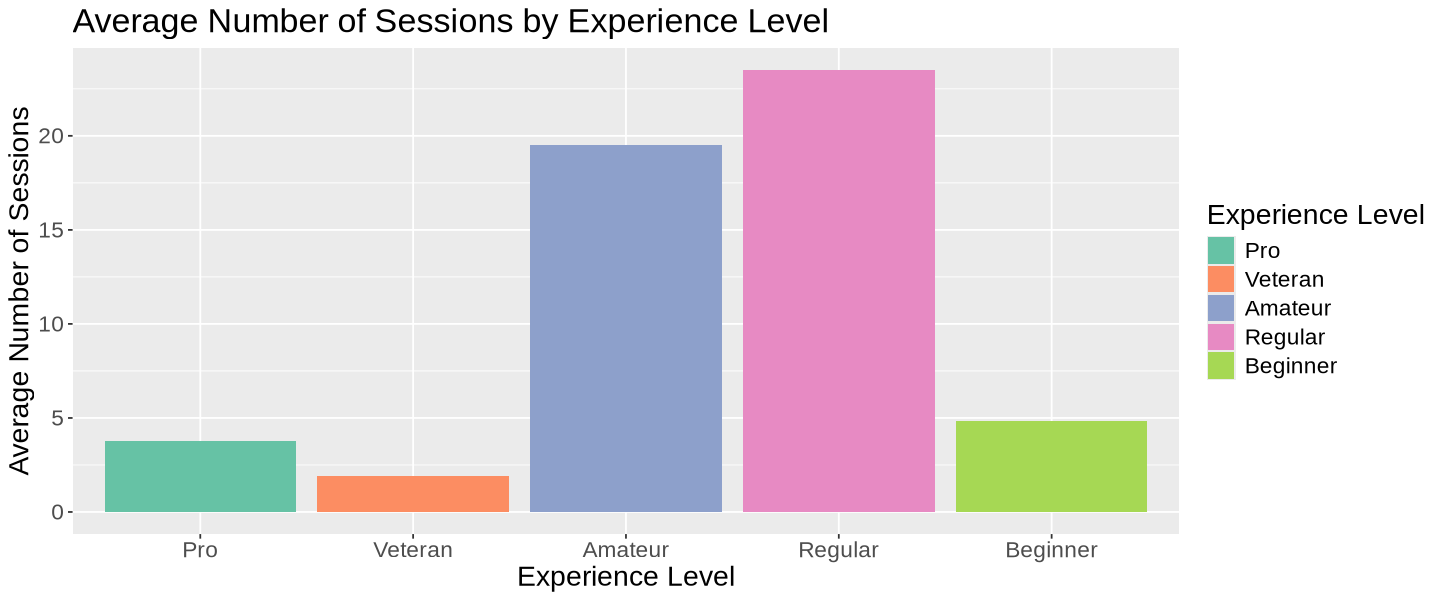

In [5]:
options(repr.plot.width = 12, repr.plot.height = 5)
# Count total sessions per player
session_counts <- player_sessions |>
  group_by(hashed_email) |>
  summarise(total_sessions = n())

# Merge session counts with experience level
session_experience <- player_sessions |>
  select(hashed_email, experience) |>
  distinct() |>
  left_join(session_counts, by = "hashed_email")

# Bar plot of total sessions by experience level
ggplot(session_experience, aes(x = experience, y = total_sessions, fill = experience)) +
  geom_bar(stat = "summary", fun = "mean") +
  labs(title = "Average Number of Sessions by Experience Level",
       x = "Experience Level",
       y = "Average Number of Sessions",
       fill = "Experience Level") +
  scale_fill_brewer(palette = "Set2") +  
  theme(text = element_text(size = 17))

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


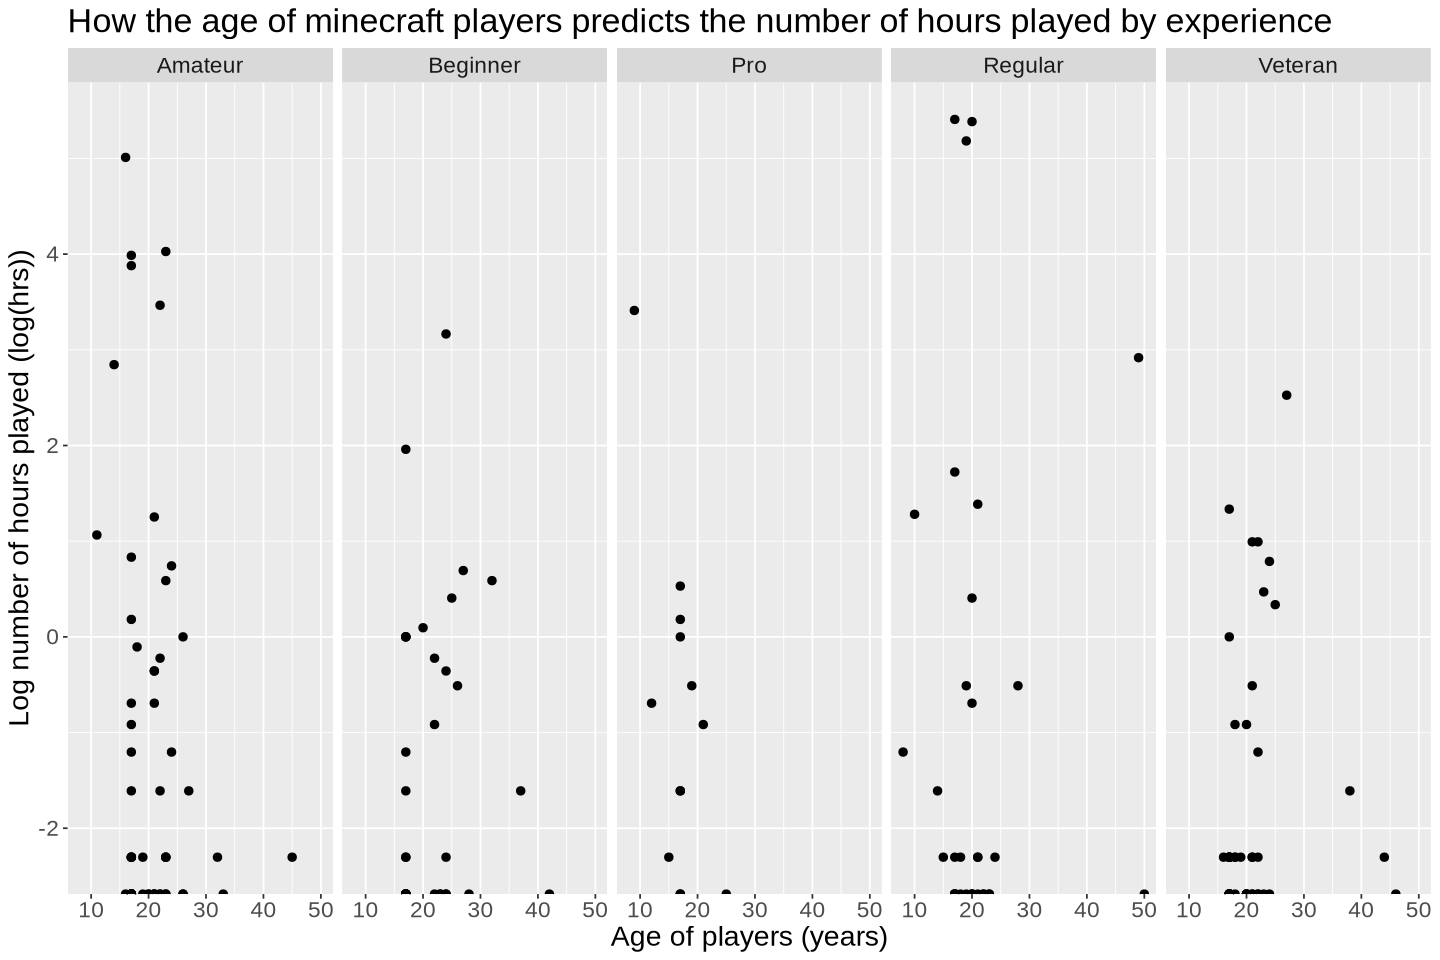

In [21]:
#visualize how age and played hours are related

options(repr.plot.width = 12, repr.plot.height = 8)

age_v_hours <- players |>
    ggplot(aes(x =  Age, y = log(played_hours))) + 
    geom_point(size = 2) + 
    facet_grid(cols = vars(experience))	+
    ggtitle("How the age of minecraft players predicts the number of hours played by experience") +  
    labs(x = "Age of players (years)", y = "Log number of hours played (log(hrs))", colour = "Experience of players") +
    theme(text = element_text(size = 17))

age_v_hours


In [7]:
player_sessions_split <- initial_split(player_sessions, prop = 0.75, strata = played_hours)
player_sessions_train <- training(player_sessions_split)
player_sessions_test <- testing(player_sessions_split)

In [8]:
ps_recipe <- recipe(played_hours ~ age + experience, data = player_sessions_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

ps_spec <- nearest_neighbor(weight_func = "rectangular", 
                            neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

ps_vfold <- vfold_cv(player_sessions_train, v = 5, strata = played_hours)

ps_wkflw <- workflow() |>
    add_recipe(ps_recipe) |>
    add_model(ps_spec)
ps_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [9]:
#compute metrics (RMPSE) to determine the best k

set.seed(2019) #set seed
# I'll change the gridvalues to ones that make sense later
gridvals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

ps_results <- ps_wkflw |>
    tune_grid(resamples = ps_vfold, grid = gridvals) |>
    collect_metrics()


ps_results

#gives error message <- have to wrangle data so experience becomes a ranked numerical variable first

→ A | error:   Error in `step_scale()`:
               Caused by error in `prep()`:
               ✖ All columns selected for the step should be double or integer.
               • 1 factor variable found: `experience`

There were issues with some computations   A: x1

There were issues with some computations   A: x5



Warning message:
“All models failed. Run `show_notes(.Last.tune.result)` for more information.”


ERROR: [1m[33mError[39m in `estimate_tune_results()`:[22m
[33m![39m All models failed. Run `show_notes(.Last.tune.result)` for more information.
